Чтение данных






In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score


data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Разведончый анализ данных и их обработка


In [3]:
# Пропуски данных
data.isnull().any().any()

False

In [4]:
# Проверка на дубликаты
data.duplicated().any()

True

In [5]:
# Удаляем дубликаты
data = data.drop_duplicates()
data.duplicated().any()

False

In [6]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

Мошеннических операций минимально по отношению к законным. Данные являются несбалансированными

Построим карту распределения кореляций для сбалансированной выборки

<Axes: >

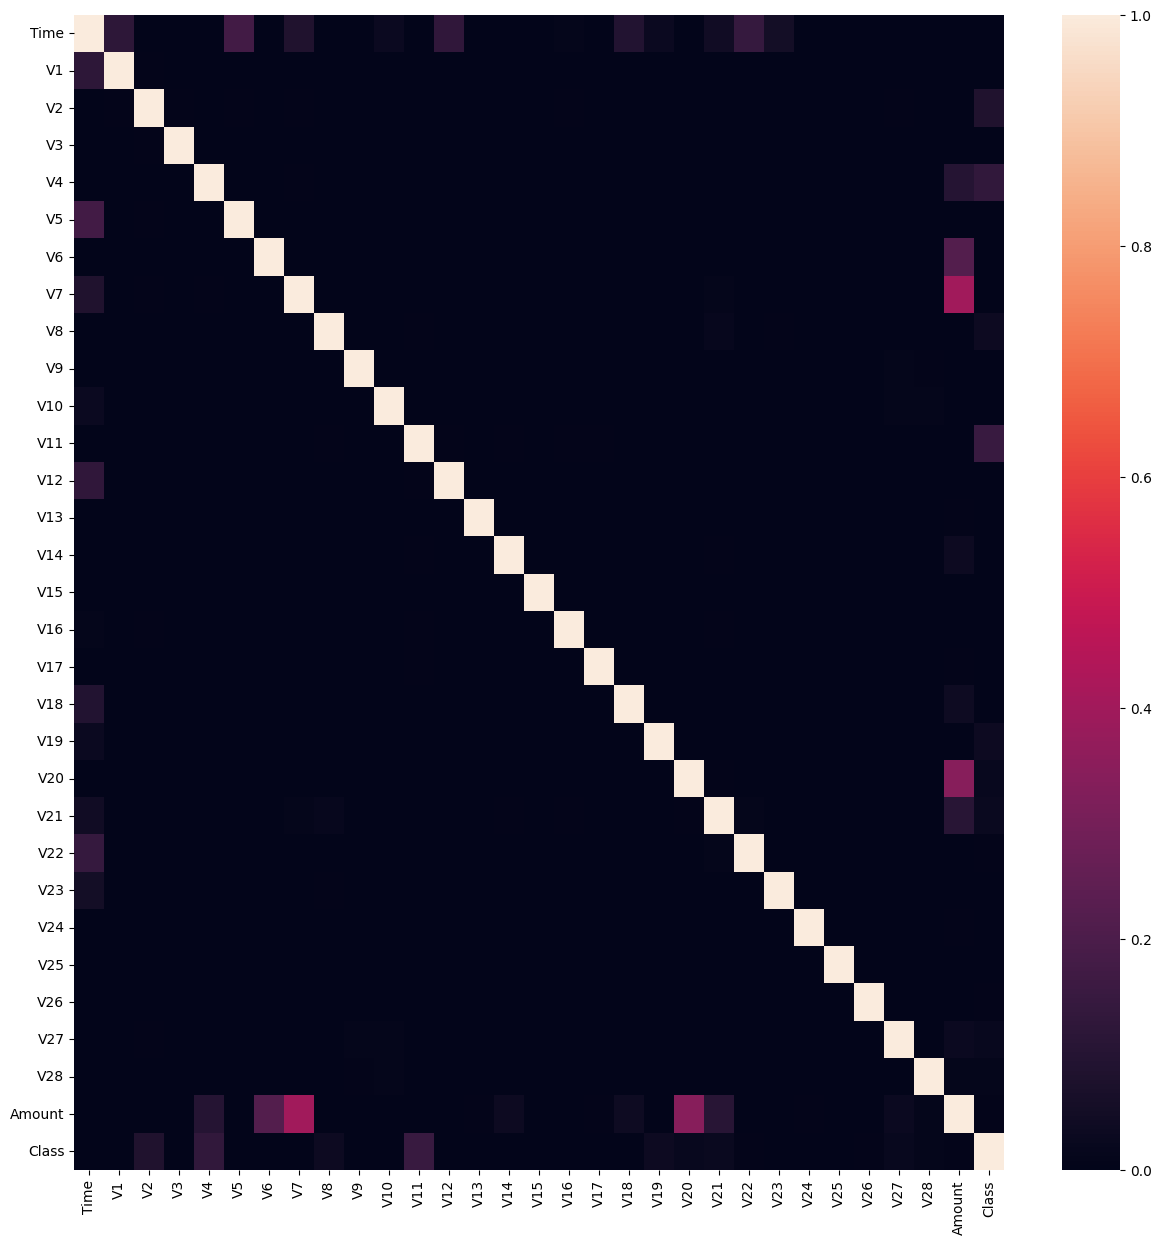

In [7]:
plt.figure(figsize=(15,15))

sns.heatmap(data.corr(), vmin=0,
    vmax=1)

Признаки V1-V28 не коррелируют между собой. Есть небольшие корреляции между признакми 'Time', 'Amount' и 'Class'.

Разделение данные на train/test

In [8]:
x=data.drop('Class',axis=1)
y=data['Class']
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=0,
    test_size=0.2,
    stratify=y
)
ss = StandardScaler()
x_train_ss = pd.DataFrame(data=ss.fit_transform(x_train), columns=ss.get_feature_names_out())
x_test_ss = pd.DataFrame(data=ss.transform(x_test), columns=ss.get_feature_names_out())

Сделаем undersampling обучающей выборки

In [9]:
nm = NearMiss(version=1)
x_nm, y_nm = nm.fit_resample(x_train_ss, y_train)

Сравним статистики генеральной, обучающей и тестовой выборки.

In [10]:
print('Статистики генеральной выборки')
data.describe()

Статистики генеральной выборки


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [11]:
print('Статистики обучающей выборки')
x_train.describe()

Статистики обучающей выборки


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,94750.938893,0.008213,-0.002460,0.004716,-0.005842,0.000594,0.000797,0.000748,0.000634,-0.002683,...,0.000770,-0.000581,-0.000782,0.000539,0.000555,-0.000164,0.000955,0.001095,0.001012,88.309019
std,47497.059848,1.931856,1.624886,1.504713,1.411102,1.375101,1.330744,1.225550,1.175332,1.096290,...,0.759984,0.721341,0.723254,0.617268,0.605368,0.520326,0.482441,0.396013,0.329968,247.249302
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-9.499423,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54182.000000,-0.915360,-0.601523,-0.884900,-0.851025,-0.691071,-0.767801,-0.552163,-0.207933,-0.646252,...,-0.211298,-0.228489,-0.542763,-0.161583,-0.354321,-0.317078,-0.327043,-0.070694,-0.052765,5.600000
50%,84613.000000,0.019737,0.063571,0.181686,-0.026530,-0.054172,-0.274268,0.038603,0.022248,-0.052752,...,-0.062505,-0.029779,0.005401,-0.011192,0.041024,0.016502,-0.051615,0.001350,0.011330,22.000000
75%,139313.250000,1.315404,0.799557,1.027616,0.736409,0.611283,0.397151,0.568575,0.327032,0.595806,...,0.133256,0.185869,0.526807,0.147415,0.439679,0.349942,0.240468,0.091065,0.078465,77.520000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,38.117209,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [12]:
y_train.describe()

count    226980.000000
mean          0.001665
std           0.040775
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [13]:
print('Статистики тестовой выборки')
x_test.describe()

Статистики тестовой выборки


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,...,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000
mean,95051.628185,-0.003265,-0.010832,-0.010799,0.008535,0.006762,-0.008885,0.006010,-0.006810,0.002753,...,-0.002142,0.000471,0.003053,-0.001164,-0.001150,-0.000507,-0.003074,0.004434,-0.001311,89.127349
std,47416.602486,2.011396,1.731221,1.524403,1.426398,1.384612,1.336651,1.236086,1.193821,1.092295,...,0.808750,0.734098,0.729712,0.648807,0.606664,0.524787,0.480489,0.394660,0.320140,262.623422
min,2.000000,-41.928738,-63.344698,-33.680984,-5.251492,-40.427726,-21.929312,-28.215112,-50.420090,-9.481456,...,-21.964898,-22.889347,-10.933144,-32.828995,-2.822684,-8.696627,-2.534330,-8.839766,-8.424041,0.000000
25%,54297.750000,-0.918296,-0.596403,-0.908194,-0.846339,-0.685710,-0.773295,-0.554272,-0.211774,-0.636702,...,-0.211940,-0.227482,-0.542402,-0.162104,-0.354820,-0.319319,-0.325689,-0.070364,-0.053049,5.680000
50%,85143.000000,0.022765,0.065587,0.172127,-0.005545,-0.050920,-0.278802,0.050034,0.020523,-0.049744,...,-0.061769,-0.028452,0.011392,-0.010995,0.040977,0.015217,-0.054529,0.002024,0.011135,22.070000
75%,139236.250000,1.319969,0.802650,1.025090,0.752185,0.615703,0.395077,0.577300,0.321264,0.596490,...,0.133044,0.187653,0.534133,0.148866,0.440057,0.353753,0.238865,0.091862,0.077458,77.500000
max,172785.000000,2.446505,18.902453,4.101716,16.715537,32.911462,23.917837,44.054461,19.168327,9.112555,...,39.420904,22.588989,7.248763,20.803344,3.998294,5.826159,3.463246,10.507884,15.632689,19656.530000


In [14]:
y_test.describe()

count    56746.000000
mean         0.001674
std          0.040882
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

Обучение модели. Проведем обучение моделей по алгоритмам kNN, SVM и decision tree на сбалансированной выборке, в качестве метрик точности будем использовать precision, recall и f1 метрики

In [15]:
knn_model = KNeighborsClassifier()
knn_model.fit(x, y);
knn_y_pred = knn_model.predict(x_test_ss)

In [16]:
print(classification_report(y_test, knn_y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      0.00      0.00        95

    accuracy                           1.00     56746
   macro avg       1.00      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



In [17]:
linear_svc = LinearSVC()
linear_svc.fit(x, y)
y_svc_predict = linear_svc.predict(x_test_ss)
print(classification_report(y_test, y_svc_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56651
           1       0.03      0.67      0.05        95

    accuracy                           0.96     56746
   macro avg       0.51      0.82      0.52     56746
weighted avg       1.00      0.96      0.98     56746



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x, y)
tree_y_pred = model.predict(x_test_ss)
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.74      0.82        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746



Пробуем сделать oversampling методом SMOTE(Synthetic Minority Over-sampling Technique)

In [19]:
sm = SMOTE(random_state=42)
x_smote, y_smote = sm.fit_resample(x_train_ss, y_train)

In [20]:
knn_model = KNeighborsClassifier()
knn_model.fit(x, y);
knn_y_pred = knn_model.predict(x_test_ss)
print(classification_report(y_test, knn_y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      0.00      0.00        95

    accuracy                           1.00     56746
   macro avg       1.00      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



In [21]:
linear_svc = LinearSVC()
linear_svc.fit(x, y)
y_svc_predict = linear_svc.predict(x_test_ss)
print(classification_report(y_test, y_svc_predict,))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56651
           1       0.03      0.67      0.05        95

    accuracy                           0.96     56746
   macro avg       0.51      0.82      0.52     56746
weighted avg       1.00      0.96      0.98     56746



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x, y)
tree_y_pred = model.predict(x_test_ss)
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.74      0.82        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746



Выводы: Как можно заметить, результаты при oversampling методом SMOTE лучше. Наилучший результат показал алгоритм k Nearest Neighbor.  

ДОРАБОТКА:

1. Добавить модель Logistic Regression.
2. Вывести confusion matrix для всех моделей
3. Свести в единую таблицу результаты всех моделей
4. Запустить обученные на сэмплированных данных модели на исходной выборке - что происходит с метриками точности?

In [23]:
# Модели
models = {
    'KNN': KNeighborsClassifier(),
    'LinearSVC': LinearSVC(),
    'DecisionTree': DecisionTreeClassifier(max_depth=3),
    'LogisticRegression': LogisticRegression()
}

In [24]:
# Списки для хранения результатов
results = []
conf_matrices = []

In [25]:
# Обучение и оценка моделей
for model_name, model in models.items():
    print(f'\n{model_name}:\n')

    # Обучение на NearMiss данных
    if model_name == 'LogisticRegression':
        model.fit(x_train_ss, y_train)
    else:
        model.fit(x_nm, y_nm)
    y_pred = model.predict(x_test_ss)

    # Вывод classification report
    print(classification_report(y_test, y_pred))

    # Вывод confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

    # Сохранение результатов
    results.append({
        'Model': model_name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })


KNN:

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     56651
           1       0.01      0.94      0.02        95

    accuracy                           0.82     56746
   macro avg       0.50      0.88      0.46     56746
weighted avg       1.00      0.82      0.90     56746


LinearSVC:



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.52      0.68     56651
           1       0.00      0.97      0.01        95

    accuracy                           0.52     56746
   macro avg       0.50      0.74      0.35     56746
weighted avg       1.00      0.52      0.68     56746


DecisionTree:

              precision    recall  f1-score   support

           0       1.00      0.14      0.24     56651
           1       0.00      0.96      0.00        95

    accuracy                           0.14     56746
   macro avg       0.50      0.55      0.12     56746
weighted avg       1.00      0.14      0.24     56746


LogisticRegression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.61      0.72        95

    accuracy                           1.00     56746
   macro avg       0.95      0.81      0.86     56746
weighted avg       1.00      1.00   

In [26]:
# Объединение результатов в единую таблицу
results_df = pd.DataFrame(results)

In [27]:
# Вывод confusion matrix для всех моделей
for i, matrix in enumerate(conf_matrices):
    print(f'\nConfusion Matrix for {list(models.keys())[i]}:\n')
    print(matrix)


Confusion Matrix for KNN:

          Predicted 0  Predicted 1
Actual 0        46411        10240
Actual 1            6           89

Confusion Matrix for LinearSVC:

          Predicted 0  Predicted 1
Actual 0        29405        27246
Actual 1            3           92

Confusion Matrix for DecisionTree:

          Predicted 0  Predicted 1
Actual 0         7693        48958
Actual 1            4           91

Confusion Matrix for LogisticRegression:

          Predicted 0  Predicted 1
Actual 0        56644            7
Actual 1           37           58


In [28]:
# Запуск моделей на исходной выборке
print('\nResults on Original Data:\n')
for model_name, model in models.items():
    model.fit(x_train_ss, y_train)
    y_pred_original = model.predict(x_test_ss)
    print(f'{model_name}:\n')
    print(classification_report(y_test, y_pred_original))



Results on Original Data:

KNN:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.80      0.87        95

    accuracy                           1.00     56746
   macro avg       0.97      0.90      0.93     56746
weighted avg       1.00      1.00      1.00     56746



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.69      0.80        95

    accuracy                           1.00     56746
   macro avg       0.97      0.85      0.90     56746
weighted avg       1.00      1.00      1.00     56746

DecisionTree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.74      0.80        95

    accuracy                           1.00     56746
   macro avg       0.94      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746

LogisticRegression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.61      0.72        95

    accuracy                           1.00     56746
   macro avg       0.95      0.81      0.86     56746
weighted avg       1.00   

In [29]:
# Сводим результаты всех моделей в единую таблицу
all_results_df = pd.concat([pd.DataFrame([result]) for result in results], ignore_index=True)

# Выводим единую таблицу результатов
print("\nSummary of Results for All Models:\n")
print(all_results_df)



Summary of Results for All Models:

                Model  Precision    Recall  F1-Score
0                 KNN   0.008617  0.936842  0.017076
1           LinearSVC   0.003365  0.968421  0.006707
2        DecisionTree   0.001855  0.957895  0.003703
3  LogisticRegression   0.892308  0.610526  0.725000


**Выводы:**

**KNN:** Имеет высокий Recall, но низкую Precision, что может означать большое количество ложноположительных результатов.

**LinearSVC:** Высокий Recall, но очень низкий Precision, что также может свидетельствовать о большом количестве ложноположительных результатов.

**DecisionTree:** Низкий Precision и высокий Recall, похожий на KNN.

**LogisticRegression:** Показывает хорошую точность (Precision) и умеренный Recall, что может сделать ее более предпочтительной моделью в данном контексте задачи.


